<h1>Current Plot<h1>

<h3>Import<h3>

In [13]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m
import statistics as stat

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
sns.set_theme()


<h3>Plot<h3>

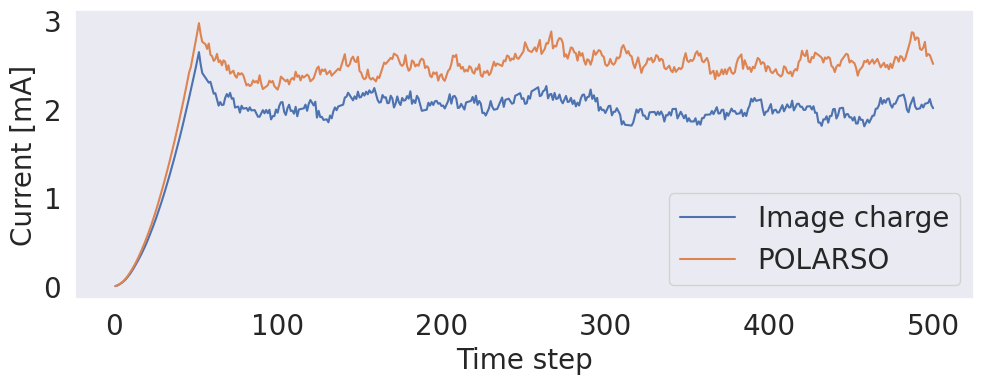

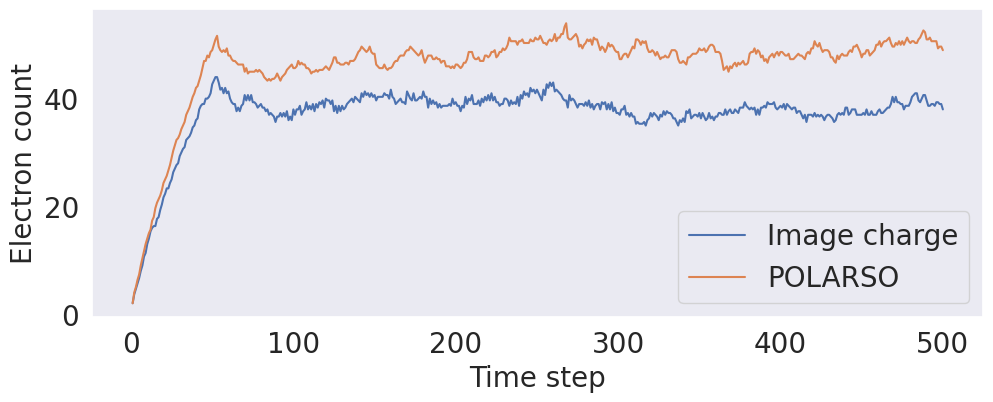

In [50]:
time_steps = np.arange(1, 501, 1)
ic_cur = np.zeros(500); ic_elec = np.zeros(500)
lp_cur = np.zeros(500); lp_elec = np.zeros(500)
nr_samples=3

for i in range(nr_samples):
    ic_filename = f'./IC/S{i+1}/out/ramo_current.dt'
    ic_data = pd.read_csv(filepath_or_buffer=ic_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
    ic_cur += ic_data['current'].values
    ic_elec += ic_data['nrElec'].values
    
    lp_filename = f'./LP/S{i+1}/out/ramo_current.dt'
    lp_data = pd.read_csv(filepath_or_buffer=lp_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
    lp_cur += lp_data['current'].values
    lp_elec += lp_data['nrElec'].values

ic_cur /= nr_samples
ic_elec /= nr_samples
lp_cur /= nr_samples
lp_elec /= nr_samples

fontz = 20
    
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(time_steps,ic_cur*1e3, label='Image charge')
ax.plot(time_steps,lp_cur*1e3, label='POLARSO')
# ax.plot(time_steps,no_cur*1e3, label='No IC or LP')
ax.set_xlabel('Time step', fontsize=fontz)
ax.set_ylabel('Current [mA]', fontsize=fontz)
ax.tick_params(axis='both', labelsize=fontz)
ax.legend(fontsize=fontz)
# ax.set_title('Current over time step with Laplace and image charge method', size='large')
plt.tight_layout()
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(11.5, 4))
ax.plot(time_steps,ic_elec, label='Image charge')
ax.plot(time_steps,lp_elec, label='POLARSO')
ax.set_xlabel('Time step', fontsize=fontz)
ax.set_ylabel('Electron count', fontsize=fontz)
ax.tick_params(axis='both', labelsize=fontz)
ax.legend(fontsize=fontz)
plt.grid()
# ax.set_title('Electron count over time step with Laplace and image charge method', size='large')
plt.show()


In [ ]:
# Root mean square error
rmse_current = np.sqrt(np.mean((ic_cur - lp_cur)**2))
rmse_elec = np.sqrt(np.mean((ic_elec - lp_elec)**2))
print(f'RMSE of current: {1e3*rmse_current} mA')
print(f'RMSE of electron count: {rmse_elec} ')

# Root mean square error between image charge 1 and 2
ic_filename_1 = f'./IC/S1/out/ramo_current.dt'
ic_filename_2 = f'./IC/S2/out/ramo_current.dt'
ic_data_1 = pd.read_csv(filepath_or_buffer=ic_filename_1, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
ic_data_2 = pd.read_csv(filepath_or_buffer=ic_filename_2, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
ic_cur_1 = ic_data_1['current'].values
ic_cur_2 = ic_data_2['current'].values
ic_elec_1 = ic_data_1['nrElec'].values
ic_elec_2 = ic_data_2['nrElec'].values
rmse_current_1 = np.sqrt(np.mean((ic_cur_1 - ic_cur_2)**2))
rmse_elec_1 = np.sqrt(np.mean((ic_elec_1 - ic_elec_2)**2))
print(f'RMSE of current between IC 1 and 2: {1e3*rmse_current_1} mA')
print(f'RMSE of electron count between IC 1 and 2: {rmse_elec_1} ')

# Root mean square error between Laplace 1 and 2
lp_filename_1 = f'./LP/S1/out/ramo_current.dt'
lp_filename_2 = f'./LP/S2/out/ramo_current.dt'
lp_data_1 = pd.read_csv(filepath_or_buffer=lp_filename_1, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
lp_data_2 = pd.read_csv(filepath_or_buffer=lp_filename_2, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])
lp_cur_1 = lp_data_1['current'].values
lp_cur_2 = lp_data_2['current'].values
lp_elec_1 = lp_data_1['nrElec'].values
lp_elec_2 = lp_data_2['nrElec'].values
rmse_current_2 = np.sqrt(np.mean((lp_cur_1 - lp_cur_2)**2))
rmse_elec_2 = np.sqrt(np.mean((lp_elec_1 - lp_elec_2)**2))
print(f'RMSE of current between LP 1 and 2: {1e3*rmse_current_2} mA')
print(f'RMSE of electron count between LP 1 and 2: {rmse_elec_2} ')

RMSE of current: 0.4749469026533788 mA
RMSE of electron count: 9.481854014672212 
RMSE of current between IC 1 and 2: 0.26830621055995796 mA
RMSE of electron count between IC 1 and 2: 4.527913426734217 
RMSE of current between LP 1 and 2: 0.26380969842563723 mA
RMSE of electron count between LP 1 and 2: 4.167493251344266 


Average distance of IC emitters: 4.0943139432377915 nm
Average distance of LP emitters: 4.029483374886543 nm


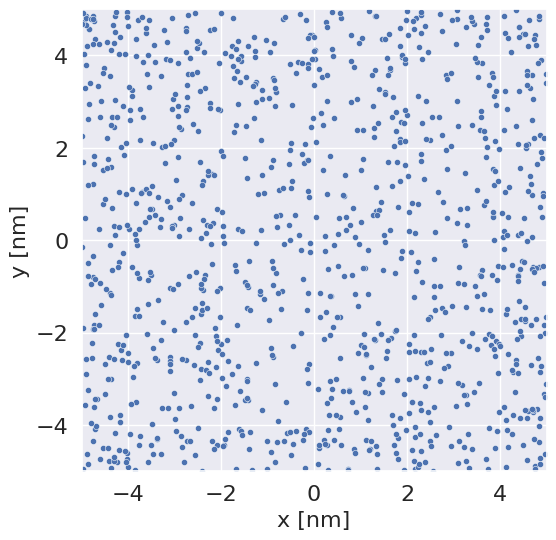

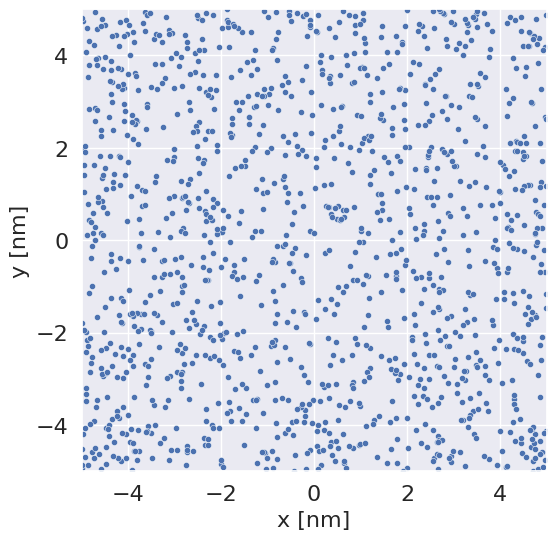

In [53]:
nr_samples=3
dt_emit_type = np.dtype([('x', np.float64), ('y', np.float64), ('z', np.float64), ('emit', np.int64), ('nr', np.int64)])

fig1, ax1 = plt.subplots(figsize=(6, 6))
fig2, ax2 = plt.subplots(figsize=(6, 6))

ic_avg = 0
lp_avg = 0

fontz = 16

for i in range(1,nr_samples+1):
    ic_filename = f'./IC/S{i}/out/density_emit_elec.bin'
    ic_data_mem_emit = np.memmap(ic_filename, dtype=dt_emit_type, mode='r', order='F')   
    ic_emit = pd.DataFrame.from_records(data=ic_data_mem_emit, columns=ic_data_mem_emit.dtype.names)
    sns.scatterplot(data=ic_emit, x="x", y="y", s=20, ax=ax1, color='b')

    lp_filename = f'./LP/S{i}/out/density_emit_elec.bin'
    lp_data_mem_emit = np.memmap(lp_filename, dtype=dt_emit_type, mode='r', order='F')   
    lp_emit = pd.DataFrame.from_records(data=lp_data_mem_emit, columns=lp_data_mem_emit.dtype.names)
    sns.scatterplot(data=lp_emit, x="x", y="y", s=20, ax=ax2, color='b')

    ic_avg += np.mean(np.sqrt(ic_emit['x']**2 + ic_emit['y']**2))/nr_samples
    lp_avg += np.mean(np.sqrt(lp_emit['x']**2 + lp_emit['y']**2))/nr_samples

print(f'Average distance of IC emitters: {ic_avg} nm')
print(f'Average distance of LP emitters: {lp_avg} nm')

ax1.set_xlabel('x [nm]', fontsize=fontz)
ax1.set_ylabel('y [nm]', fontsize=fontz)
ax1.tick_params(axis='both', labelsize=fontz)
ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)
ax1.tick_params(axis='both', labelsize=fontz)
plt.grid()

ax2.set_xlabel('x [nm]', fontsize=fontz)
ax2.set_ylabel('y [nm]', fontsize=fontz)
ax2.tick_params(axis='both', labelsize=fontz)
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.tick_params(axis='both', labelsize=fontz)
plt.grid()
    

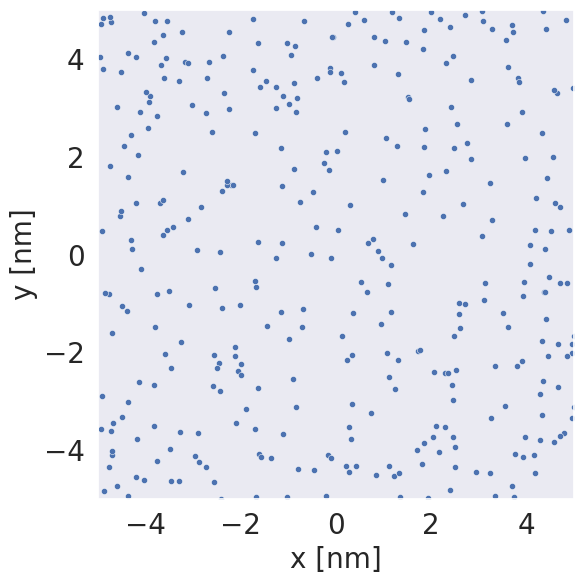

Average distance from center: 4.137211786899673 nm


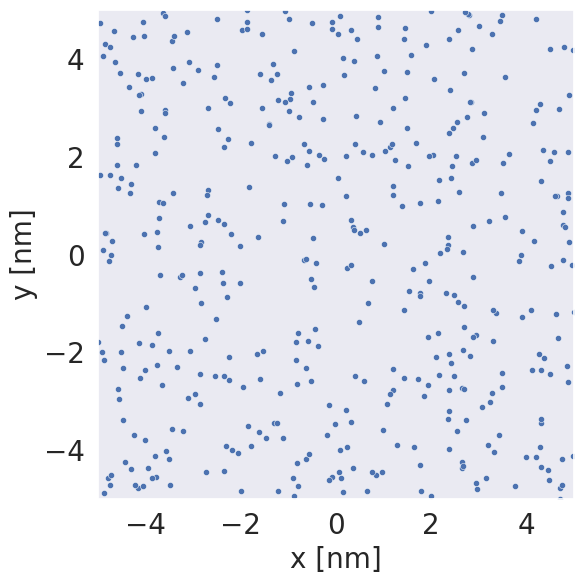

Average distance from center: 3.996801185760013 nm


In [29]:
# Emission density
dt_emit_type = np.dtype([('x', np.float64), ('y', np.float64), ('z', np.float64), ('emit', np.int64), ('nr', np.int64)])

ic_filename = './IC/S1/out/density_emit_elec.bin'
ic_data_mem_emit = np.memmap(ic_filename, dtype=dt_emit_type, mode='r', order='F')   
ic_emit = pd.DataFrame.from_records(data=ic_data_mem_emit, columns=ic_data_mem_emit.dtype.names)
    
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=ic_emit, x="x", y="y", s=20, ax=ax)
# ax.set_title('Emission density - Image charge', size='x-large')
ax.set_xlabel('x [nm]', fontsize=fontz)
ax.set_ylabel('y [nm]', fontsize=fontz)
ax.tick_params(axis='both', labelsize=fontz)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.tight_layout()
plt.show()

avg_distance_from_center = np.mean(np.sqrt(ic_emit['x']**2 + ic_emit['y']**2))
print(f'Average distance from center: {avg_distance_from_center} nm')


lp_filename = './LP/S1/out/density_emit_elec.bin'
lp_data_mem_emit = np.memmap(lp_filename, dtype=dt_emit_type, mode='r', order='F')   
lp_emit = pd.DataFrame.from_records(data=lp_data_mem_emit, columns=lp_data_mem_emit.dtype.names)

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=lp_emit, x="x", y="y", s=20, ax=ax)
# ax.set_title('Emission density - Laplace', size='x-large')
ax.set_xlabel('x [nm]', fontsize=fontz)
ax.set_ylabel('y [nm]', fontsize=fontz)
ax.tick_params(axis='both', labelsize=fontz)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.tight_layout()
plt.show()

avg_distance_from_center = np.mean(np.sqrt(lp_emit['x']**2 + lp_emit['y']**2))
print(f'Average distance from center: {avg_distance_from_center} nm')